# **importing  the libraries **

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/Train.csv')

In [ ]:
train.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [ ]:
#now we'll encode the string value of column A
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['A']=label_encoder.fit_transform(train['A'])
train['A'].unique()

array([0, 2, 1])

**create** a heatmap to know the correalations between the features

<Axes: >

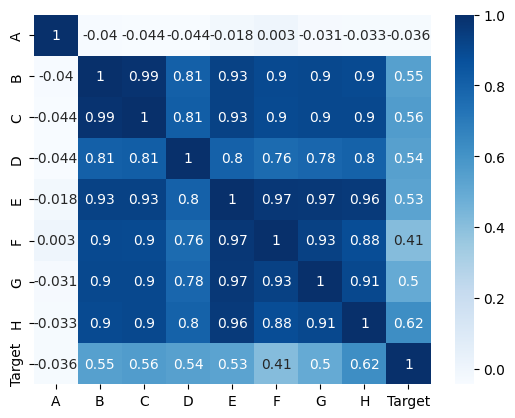

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap="Blues")

In [ ]:
x= train.drop(['Target'], axis=1)
y = train['Target']

# Feature Scaling the data

In [ ]:
columns=['B','C','D','E','F','G','H']
deff=['E']

#performing feature scaling of column E bcoz it is having large values than the other columns

scaler=StandardScaler()
scaler.fit(x[deff])
x[deff]=scaler.transform(x[deff])


As we can see in the heat map column A is having the least impact on the Target thus, we'll drop it

In [ ]:
x = train.drop(['Target','A'], axis=1)
y = train['Target']

In [ ]:
x

,B,C,D,E,F,G,H
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350
...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235


Splittin the DATA

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1)

## Buildin SVR model

In [ ]:
svr = SVR()
# Defining the parameter for grid
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 10, 20],
    'gamma': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'degree' : [2,3]
}

In [ ]:
#performing the grid search

grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 20], 'degree': [2, 3],
                         'epsilon': [0.01, 0.1, 1], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf', 'sigmoid']})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 10, 'kernel': 'rbf'}

Finding the Best Hyperparameters

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE", mse)
print("Best Hyperparameters:", best_params)

Mean Squared Error: 5.272080167265439
Best Hyperparameters: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 10, 'kernel': 'rbf'}


Training the data


In [ ]:
svr = SVR(kernel = "rbf", degree = 2, C = 10, epsilon =1, gamma =10)
#fitting the data
svr.fit(x_train,y_train)

SVR(C=10, degree=2, epsilon=1, gamma=10)

Calculating MSE and RMSE



In [ ]:
y_pred = svr.predict(x_val)
mse = mean_squared_error(y_val, y_pred)

In [ ]:
mse

5.603875081751414

In [ ]:
rmse=np.sqrt(mse)
rmse

## TESTING THE MODEL

In [ ]:
test = pd.read_csv('Test.csv')

In [ ]:
test.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [ ]:
Index=test['Index']
test.drop(['Index','A'],axis=1,inplace=True)

In [ ]:
test.head()

,B,C,D,E,F,G,H
0,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [ ]:
y_test = svr.predict(test)

In [ ]:
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test

In [ ]:
result

,Index,Target
0,866,11.783894
1,1483,9.287778
2,599,15.895778
3,1702,11.288457
4,670,11.828663
...,...,...
1040,532,9.659609
1041,3417,9.132622
1042,1505,11.495099
1043,2245,11.722026


In [ ]:
result.to_csv("submission4.csv", index=False)